In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import Sequential, layers

In [18]:
train_datagen = ImageDataGenerator(
                rescale=1./255, 
                shear_range=0.2,
                zoom_range=0.2, 
                horizontal_flip=True 
            )

val_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
                    '../Cat-or-Dog/cat-dog-data/training_set/training_set', 
                    target_size=(224, 224), 
                    batch_size=32, 
                    class_mode='binary'
                )
val_generator = val_datagen.flow_from_directory(
                    '../Cat-or-Dog/cat-dog-data/test_set/test_set', 
                    target_size=(224, 224), 
                    batch_size=32, 
                    class_mode='binary' 
                )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


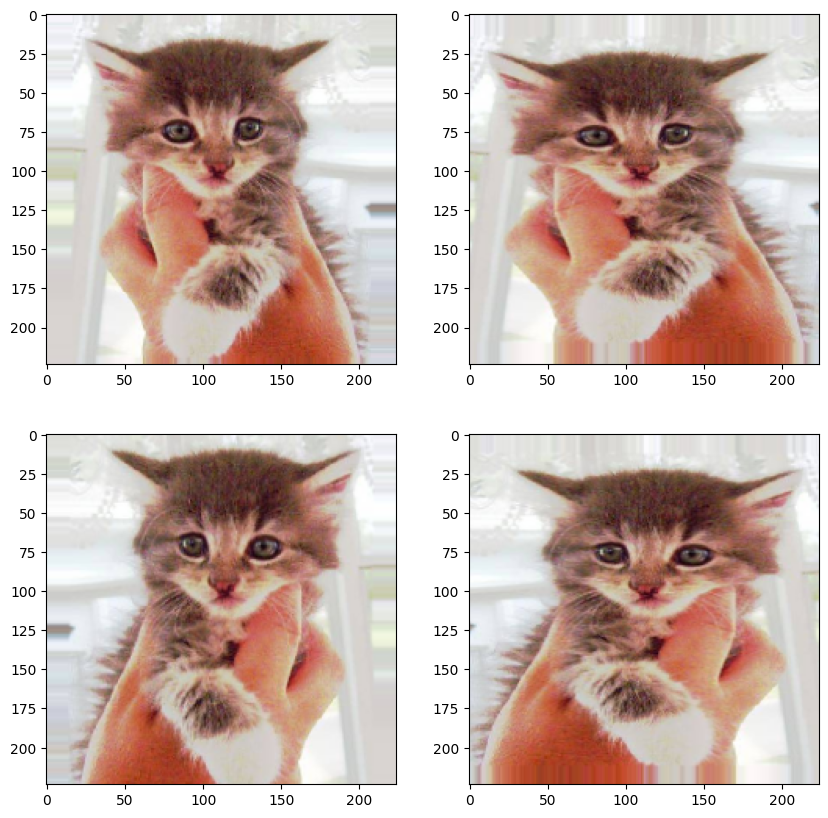

In [20]:
img_path = '../Cat-or-Dog/cat-dog-data/training_set/training_set/cats/cat.100.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()
for i, batch in enumerate(train_datagen.flow(x, batch_size=1)):
    ax[i].imshow(batch[0])
    if i == 3:
        break
plt.show()

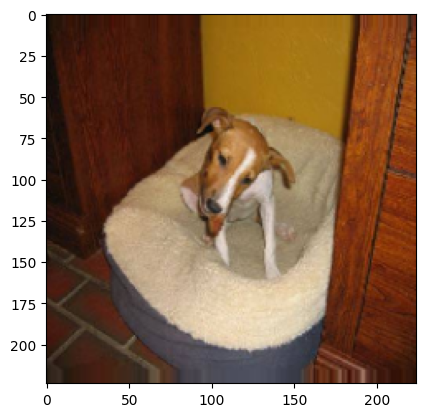

In [21]:
x, y = train_generator.next()
image = x[0]
plt.imshow(image)
plt.show()

In [22]:
model = Sequential(
            [
                layers.Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(64,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(128,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(128,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Flatten(),
                layers.Dense(512, activation='relu'),
                layers.Dense(1, activation='sigmoid')
             ]
)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [24]:
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(train_generator,epochs=15, validation_data=val_generator)

Epoch 1/15
251/251 [==============================] - 37s 146ms/step - loss: 0.6890 - accuracy: 0.5548 - val_loss: 0.6621 - val_accuracy: 0.6036
Epoch 2/15
251/251 [==============================] - 35s 141ms/step - loss: 0.6280 - accuracy: 0.6445 - val_loss: 0.5845 - val_accuracy: 0.6802
Epoch 3/15
251/251 [==============================] - 36s 145ms/step - loss: 0.5833 - accuracy: 0.6891 - val_loss: 0.5398 - val_accuracy: 0.7375
Epoch 4/15
251/251 [==============================] - 38s 151ms/step - loss: 0.5367 - accuracy: 0.7238 - val_loss: 0.4895 - val_accuracy: 0.7553
Epoch 5/15
251/251 [==============================] - 38s 150ms/step - loss: 0.4832 - accuracy: 0.7664 - val_loss: 0.4640 - val_accuracy: 0.7711
Epoch 6/15
251/251 [==============================] - 38s 153ms/step - loss: 0.4544 - accuracy: 0.7904 - val_loss: 0.4322 - val_accuracy: 0.8047
Epoch 7/15
251/251 [==============================] - 38s 153ms/step - loss: 0.4281 - accuracy: 0.8042 - val_loss: 0.4379 - val_ac